เขียนโปรแกรมแสดงความสัมพันธ์ระหว่าง complexity ของ model และ etrain, etest ของ ridge regression (Lecture หน้าที่ 44)

## Step 1: Importing Libraries

In [484]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

## Step 2: Generating Synthetic Data

In [485]:
# x = np.array([0, 0.11, 0.2, 0.3, 0.45, 0.55, 0.7, 0.8, 0.9, 1])
# y = np.sin(2 * np.pi * x) + np.random.randn(len(x)) * 0.1
x = np.array([0, 0.095, 0.18, 0.3, 0.45, 0.55, 0.64, 0.71, 0.89, 1])
y = np.array([0, 0.8, 1, 0.97, 0.05, 0.09, -0.89, -0.5, -0.64, 0.2])

# Generate test data
x_test = np.linspace(0, 1, 100)
y_test = np.sin(2 * np.pi * x_test)

## Step 3: Plotting Model Predictions

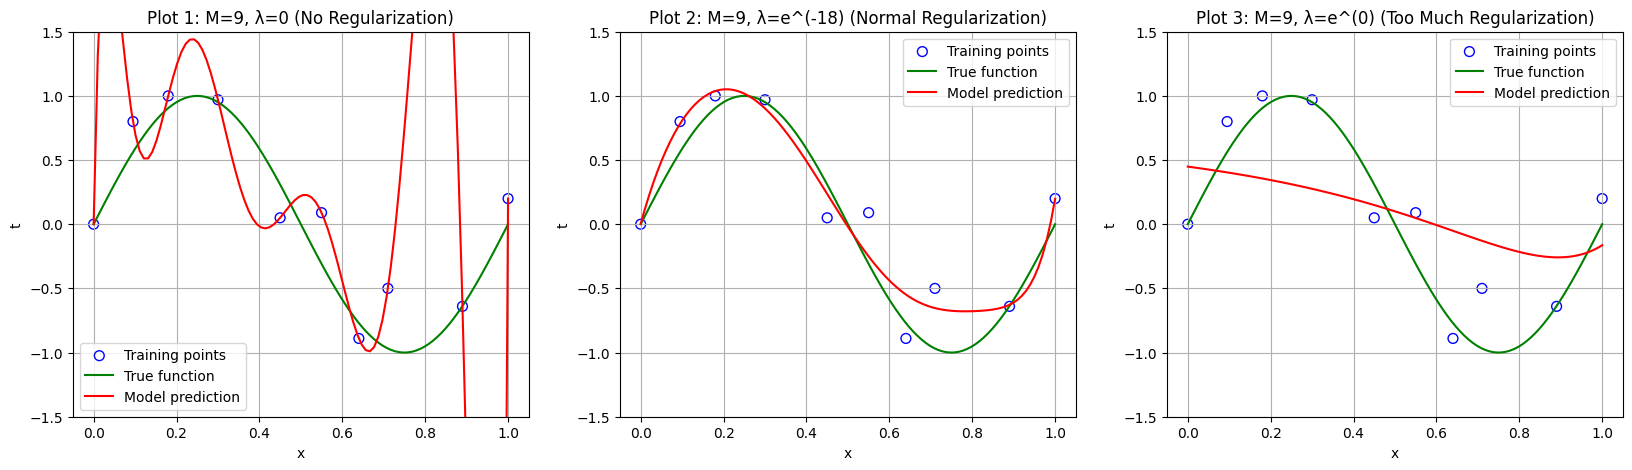

In [486]:
# Different polynomial degrees and regularization parameters
degrees = [9, 9, 9]
lambdas = [0, np.exp(-18), np.exp(0)]
titles = ["Plot 1: M=9, λ=0 (No Regularization)", "Plot 2: M=9, λ=e^(-18) (Normal Regularization)", "Plot 3: M=9, λ=e^(0) (Too Much Regularization)"]

# Plot settings for model predictions
plt.figure(figsize=(20, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(x, y, edgecolor='b', s=50, facecolor='none', label="Training points")

    # Polynomial regression with Ridge regularization
    poly = PolynomialFeatures(degree=degrees[i])
    model = make_pipeline(poly, Ridge(alpha=lambdas[i]))
    model.fit(x[:, np.newaxis], y)

    # Generate prediction
    y_pred = model.predict(x_test[:, np.newaxis])

    # Plot the data
    plt.plot(x_test, np.sin(2 * np.pi * x_test), color='green', label="True function")
    plt.plot(x_test, y_pred, color='red', label="Model prediction")
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title(titles[i])
    plt.legend()
    plt.grid(True)

    # Set y-axis limits to focus on the green line
    plt.ylim(-1.5, 1.5)

plt.show()

## Step 4: Plotting Training and Test Errors

c:\Users\kasea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.84848e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kasea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.0977e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kasea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.35974e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kasea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.63525e-19): result may not be accurate.
  return linalg.solve(

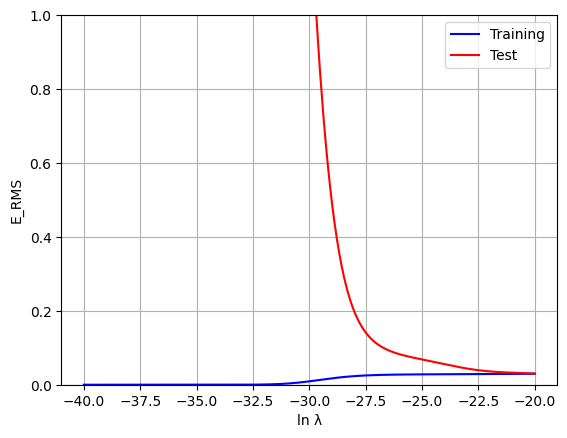

In [487]:
lambda_values = np.linspace(-40, -20, 400)
train_errors = []
test_errors = []

for log_lambda in lambda_values:
    alpha = np.exp(log_lambda)
    model = make_pipeline(PolynomialFeatures(degree=9), Ridge(alpha=alpha))
    model.fit(x[:, np.newaxis], y)
    
    y_train_pred = model.predict(x[:, np.newaxis])
    y_test_pred = model.predict(x_test[:, np.newaxis])
    
    train_errors.append(mean_squared_error(y, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure()
plt.plot(lambda_values, train_errors, label="Training", color='blue')
plt.plot(lambda_values, test_errors, label="Test", color='red')
plt.xlabel("ln λ")
plt.ylabel("E_RMS")

# Dynamic y-axis range
y_min, y_max = 0, 1  # Set y-axis limits
plt.ylim(y_min, y_max)

plt.legend()
plt.grid(True)
plt.show()